In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reDf = pd.read_csv('Real estate.csv')

print(reDf.shape)
reDf.describe()

# reDf

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [2]:
reDf.drop(columns=['No'] , inplace= True)
reDf

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Removing Outliers from column 5


def outlierRemover(d):
    q1 = np.percentile(d , 25)
    q3 = np.percentile(d , 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound , upper_bound    

In [32]:
lf , rf = outlierRemover(reDf['X5 latitude'])

print('Left bound' , lf)
print('Right bound' , rf)

# reDf[(reDf['X5 latitude'] < lf) | (reDf['X5 latitude'] > rf)]

df = reDf[(reDf['X5 latitude'] >= lf) & (reDf['X5 latitude'] <= rf)]



Left bound 24.941317500000004
Right bound 24.999137499999996


<Axes: ylabel='X5 latitude'>

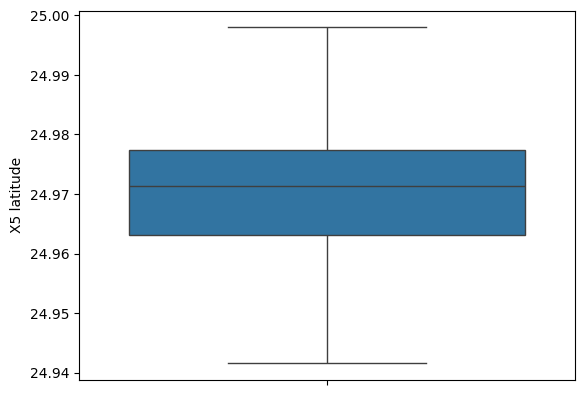

In [33]:
sns.boxplot(df['X5 latitude'])

<Axes: ylabel='X3 distance to the nearest MRT station'>

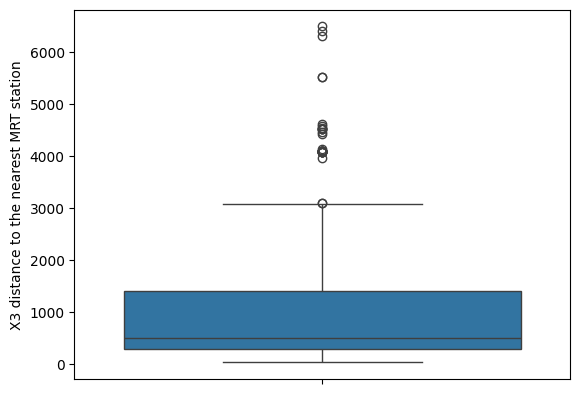

In [ ]:
sns.boxplot(df['X3 distance to the nearest MRT station'])

In [ ]:
lfX3 , rfX3 = outlierRemover(df['X3 distance to the nearest MRT station'])

dfWithoutX3 = df[(df['X3 distance to the nearest MRT station'] >= lfX3) & (df['X3 distance to the nearest MRT station'] <= rfX3)]

<Axes: ylabel='X3 distance to the nearest MRT station'>

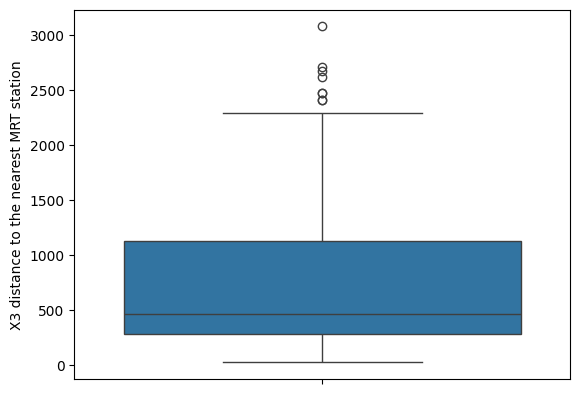

In [ ]:
sns.boxplot(df['X3 distance to the nearest MRT station'])

In [36]:
df.rename(columns={
    'X1 transaction date': 'TransactionDate',
    'X2 house age': 'HouseAge',
    'X3 distance to the nearest MRT station': 'DistanceToTheNearestMRTStation',
    'X4 number of convenience stores': 'ConvenienceStores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'HousePriceOfUnitArea',

}, inplace = True)

C:\Users\AK\AppData\Local\Temp\ipykernel_16936\39331695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


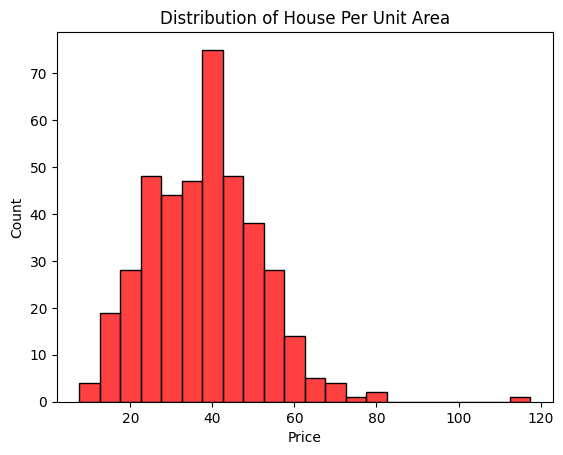

In [39]:
sns.histplot(df['HousePriceOfUnitArea'] , color= 'red' )
plt.title('Distribution of House Per Unit Area')
plt.xlabel('Price')
plt.show()

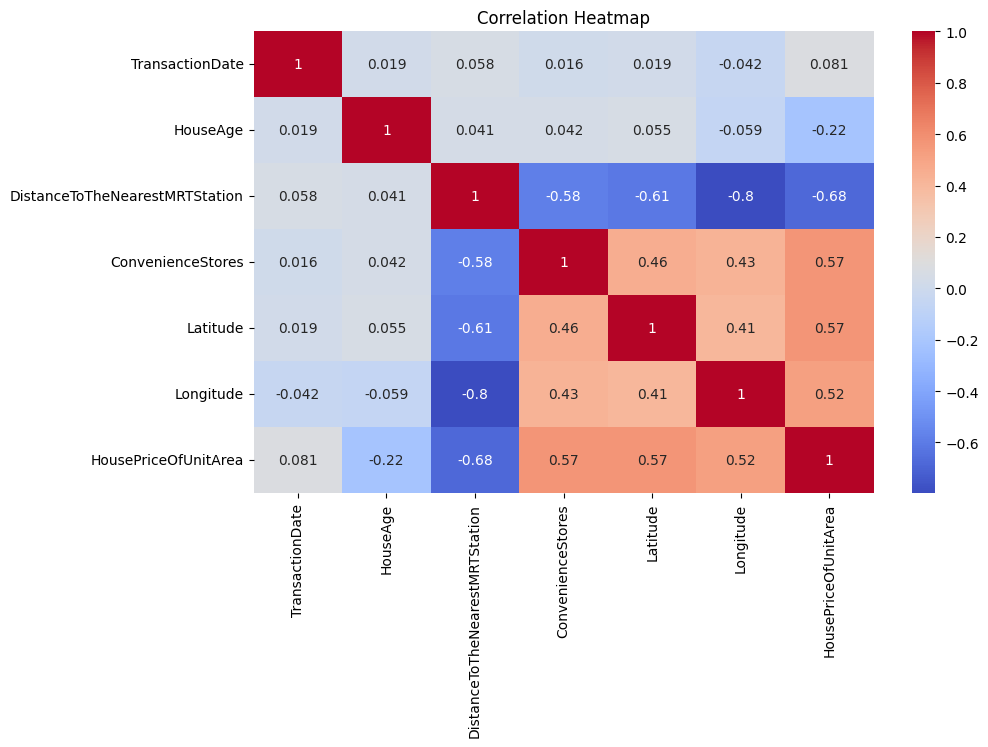

In [48]:
plt.figure(figsize=(10 , 6)) # this will create a blank canvas then we will draw on this fig

sns.heatmap(df.corr() , annot = True , cmap= 'coolwarm') # heatmap(correlation , annot means the labels of each cell , colormap)
plt.title('Correlation Heatmap')
plt.show()

# correlation heatmap is basically used to compare one column with another

### MY WORK

In [5]:
reDf.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [2]:
reDf.rename(columns={
    'X1 transaction date': 'TransactionDate',
    'X2 house age': 'HouseAge',
    'X3 distance to the nearest MRT station': 'DistanceToTheNearestMRTStation',
    'X4 number of convenience stores': 'ConvenienceStores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'HousePriceOfUnitArea',

}, inplace = True)
reDf

,No,TransactionDate,HouseAge,DistanceToTheNearestMRTStation,ConvenienceStores,Latitude,Longitude,HousePriceOfUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


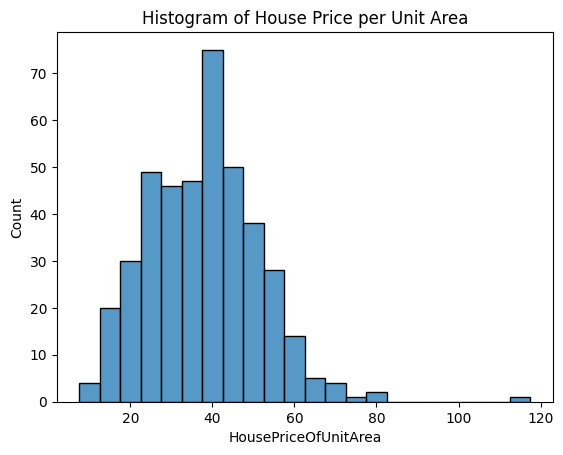

In [3]:
sns.histplot(reDf['HousePriceOfUnitArea'])
plt.title('Histogram of House Price per Unit Area')
plt.show()

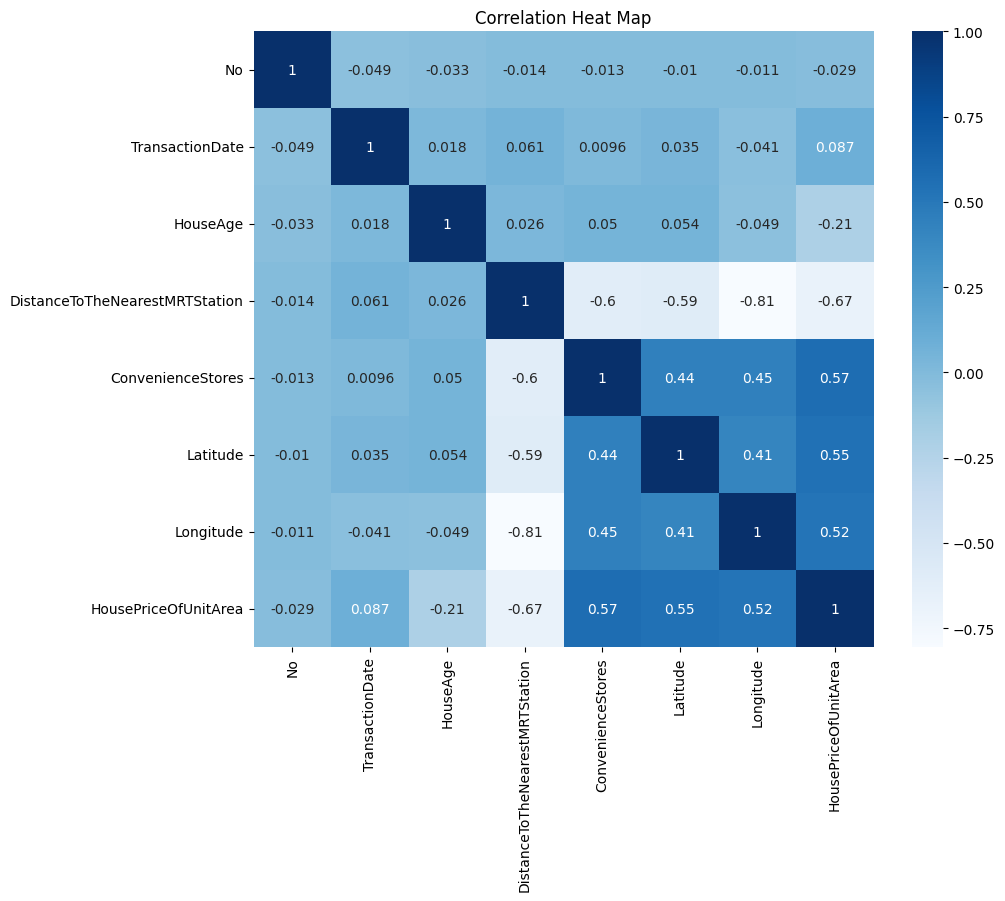

In [4]:
plt.figure(figsize=(10 ,8))

sns.heatmap(reDf.corr() , annot= True ,  cmap='Blues')
plt.title('Correlation Heat Map')
plt.show()

## Insights

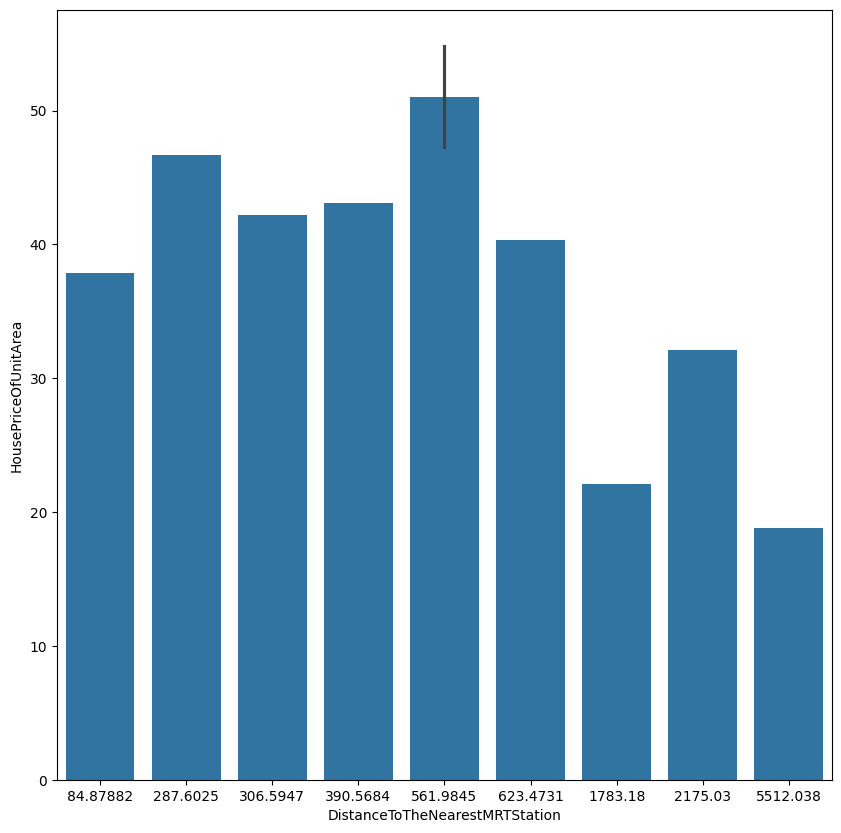

In [5]:
# Does Proximity to the MRT Station affect House Prices

reDf['HousePriceOfUnitArea'].corr(reDf['DistanceToTheNearestMRTStation'])

# OR: reDf[['house_price', 'distance_to_MRT']].corr()
plt.figure(figsize=(10 , 10))

sns.barplot(y = 'HousePriceOfUnitArea' , x= 'DistanceToTheNearestMRTStation' , data= reDf.head(10))
plt.show()

Text(0, 0.5, 'House Price')

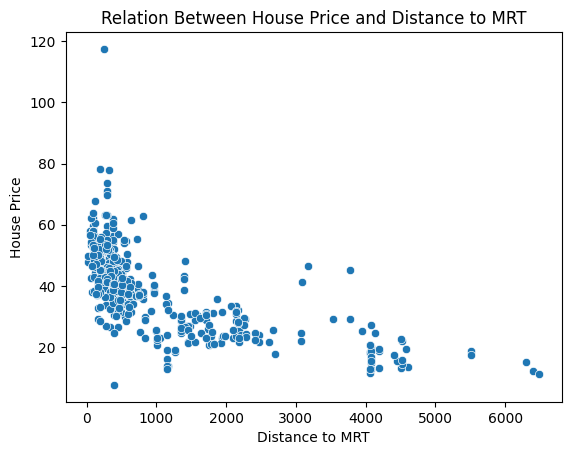

In [6]:
# Sir Choice:

sns.scatterplot(data = reDf , x = 'DistanceToTheNearestMRTStation' , y ='HousePriceOfUnitArea')
plt.title('Relation Between House Price and Distance to MRT')
plt.xlabel('Distance to MRT')
plt.ylabel('House Price')


<Axes: xlabel='ConvenienceStores', ylabel='HousePriceOfUnitArea'>

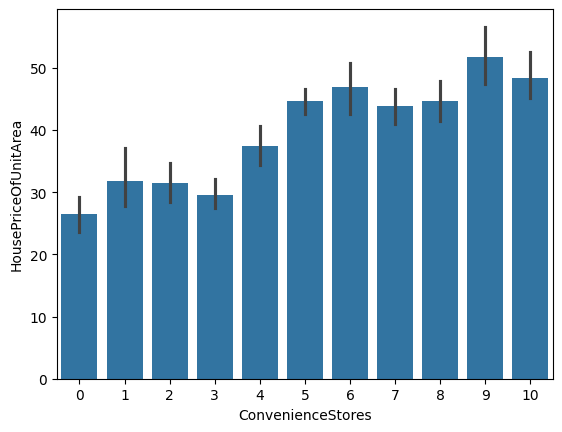

In [10]:
#  Is there a correlation between number of convenience stores and house prices?

reDf['HousePriceOfUnitArea'].corr(reDf['ConvenienceStores'])

sns.barplot(y = 'HousePriceOfUnitArea' , x = 'ConvenienceStores' , data= reDf)

<Axes: xlabel='HouseAge', ylabel='HousePriceOfUnitArea'>

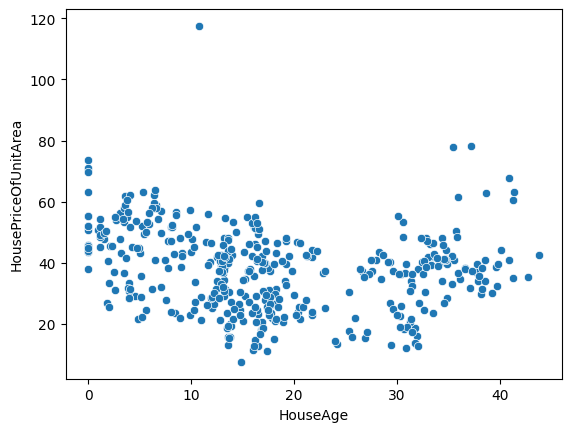

In [ ]:
# Does house age negatively impact price?

# We have to find covarience because they are not saying that whats the strength so just find the covariance

reDf.HousePriceOfUnitArea.corr(reDf['HouseAge'])

sns.scatterplot(y = 'HousePriceOfUnitArea' , x = 'HouseAge' , data = reDf)

In [ ]:
# Are there any seasonal (monthly) patterns in house pricing?

# convert the transaction date into month

numpy.float64

In [ ]:
# What are the top 5 most expensive areas (based on latitude/longitude)?

sortedByPrice = reDf.groupby(['Longitude' , 'Latitude'])['HousePriceOfUnitArea'].mean().nlargest(5) # we use mean here because if two houses have same lat and long then it will consider avg
sortedByPrice

# sns.barplot(data = sortedByPrice.head(5) , y = 'Longitude' , x = 'HousePriceOfUnitArea' )

Longitude  Latitude
121.53046  24.97460    117.50
121.54265  24.97703     78.30
121.54069  24.97071     78.00
121.54458  24.97744     69.54
121.54230  24.96756     67.70
Name: HousePriceOfUnitArea, dtype: float64